---
title: Are Americans getting less helathier? 
---

*By: Esther Aduamah and Brandon Spiller*

## Introduction

We are looking into seeing “Are Americans getting less healthy based on what they’re eating? Americans are known to be some of the unhealthiest people in the world. As discussed in the [article] (https://www.uab.edu/inquiro/issues/past-issues/volume-9/the-effects-of-an-american-diet-on-health), we see how a lot of the typical American diet has been linked to rising rates of obesity, diabetes, and heart disease. Understanding what exactly we are eating along with the Nutrient Rich Foods (NRF) index and daily values can help to impact what we are buying to eat. If the nutrient trends have spikes in sugars/fats, we can see when, in what foods, and how much, and we can see how much health problems will rise. We decided that we needed to look at what Americans are eating and the nutrients in them. If they are too many unhealthy nutrients then we got our answer. Seeing increases or spikes over time helps even more. To begin answering this question, we looked at two main datasets: USDA FoodAPS data to see what foods people bought, when they bought them, and what nutrients those foods contained, and USDA’s FoodData Central which had commonly store bought meals in America and a nutrient breakdown of all of them with specific nutrients.   

[Source](https://www.uab.edu/inquiro/issues/past-issues/volume-9/the-effects-of-an-american-diet-on-health)

## Methodology
The United States Department of Agriculture keeps an extensive database of information about food. The information we used is all hosted by [USDA](https://www.usda.gov/). We used following two datasets: Public-Use Data Files and Codebooks from the FoodAPS National Household Food Acquisition and Purchase Survey [https://www.ers.usda.gov/data-products/foodaps-national-household-food-acquisition-and-purchase-survey] as well as the FoodData Central (FDC) [https://fdc.nal.usda.gov/]. 

The **FoodData Central** were accsessed programatically through the USDA's API. This data was stored as a JSON file.

**FoodAPS National Household Food Acquisition and Purchase Survey** was downloaded from the USDA website as a CSV file and read into our code as a Pandas Dataframe. 

Below is the specific data that we used from each of the datasets:

- **FoodAPS National Household Food Acquisition and Purchase Survey**
    - nutrient breakdown in each food item (faps_fahnutrients)
    - household groceries and food items they bought (faps_fahitem_puf)
    - each groceries shopping date and details (faps_fahevent_puf)
- **FoodData Central**
    - specific food being bought with specific foods. 

We got and stored the FoodAPS data using Pandas. First by loading the three CSV files from FoodAPS into three seperate dataframes. 

For the bar chart, we used merge to link together the food purchase data with the nutrient inforation and when the household bought the food. After we used a loop to go through event, see what month it is in and add the appropriate nutrients. We also added total nutirent values when applicable and created a line chart. 


## Results
We created three visualizations: a bar chart to represent the NRF score of the ten most common foods ate in America, a stacked bar chart to see the percentage of how much a household goes above or below the recommended daily value for a 2000 calorie diet, and a line chart to depict the total nutrients consumed over the course of year. 

In [20]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


To see just how much households were consuming, we looked into the total nutrient consumption over about a year’s period of time. We had four lines each for a specific nutrient– protein, fat, carbohydrates, and sugar– that totaled the entire nutrient amount in each line. It was based on not We found that households ate the most carbohydrates out of any of the nutrients (like it doubled)! We also saw spikes in the late summer to early fall. 

          month  protein
0       2012-04     0.88
1       2012-04     3.10
2       2012-04    16.51
3       2012-04    14.09
4       2012-04     0.00
...         ...      ...
143045  2013-01     4.37
143046  2013-01    13.41
143047  2013-01    18.74
143048  2013-01     2.82
143049  2013-01     9.87

[143050 rows x 2 columns]


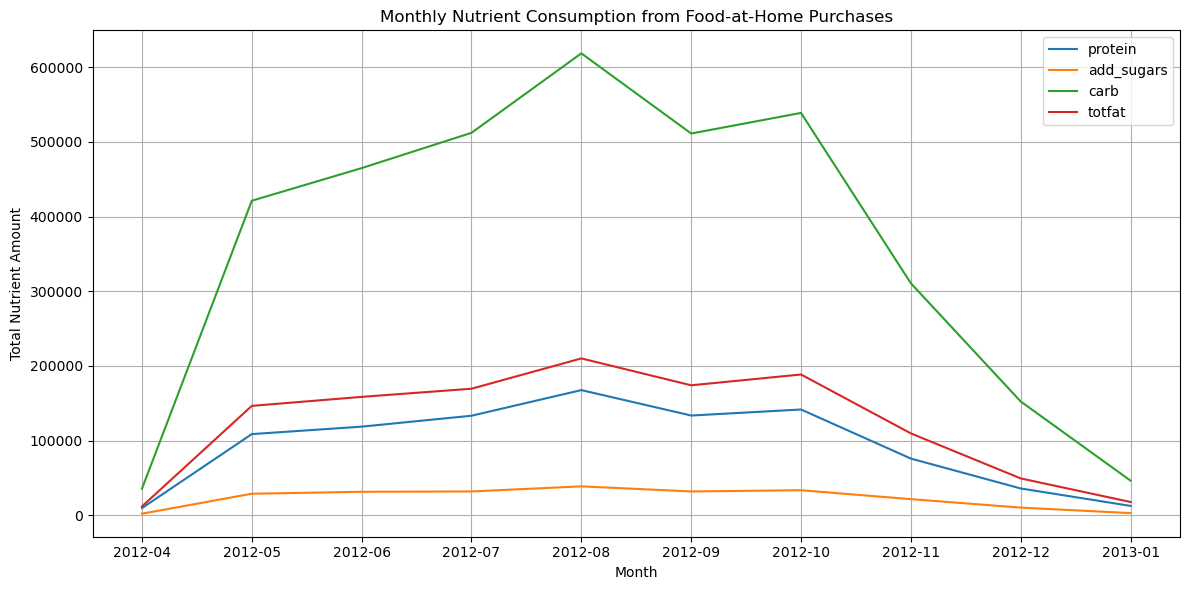

In [ ]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from perhaps_interest import merge_items_with_nutrients

fah_items = pd.read_csv("csv_data/faps_fahitem_puf.csv", encoding="latin-1")
fah_nutrients = pd.read_csv(
    "csv_data/faps_fahnutrients.csv", encoding="latin-1"
)
fahevent = pd.read_csv("csv_data/faps_fahevent_puf.csv", encoding="latin-1")

merged_data = merge_items_with_nutrients(fah_items, fah_nutrients, fahevent)

# Create 'month' column and group by month
merged_data["month"] = merged_data["date"].dt.to_period("M")
merged_data = merged_data.sort_values(by="month").reset_index(drop=True)  # Sorting by month in asc order
nutrients_month_total = pd.DataFrame(columns=["protein", "add_sugars", "carb", "totfat"])  # Making a new df for month aggregate

i = 0
months = list(merged_data["month"].unique())
months.sort()
for month in months:  # Cycling through each month
    one_month_total = [0, 0, 0, 0]  # Each number represent the aggregate of a month for the four columns respectively
    while (i < merged_data.shape[0]) and (merged_data.loc[i, "month"] == month):  # While we are still in this month
        if not pd.isna(merged_data.loc[i, "protein"]):  # Checking for NaN because it messes up +=
            one_month_total[0] += merged_data.loc[i, "protein"]
        if not pd.isna(merged_data.loc[i, "add_sugars"]):
            one_month_total[1] += merged_data.loc[i, "add_sugars"]
        if not pd.isna(merged_data.loc[i, "carb"]):
            one_month_total[2] += merged_data.loc[i, "carb"]
        if not pd.isna(merged_data.loc[i, "totfat"]):
            one_month_total[3] += merged_data.loc[i, "totfat"]
        i += 1
    nutrients_month_total.loc[month, "protein"] = one_month_total[0]
    nutrients_month_total.loc[month, "add_sugars"] = one_month_total[1]
    nutrients_month_total.loc[month, "carb"] = one_month_total[2]
    nutrients_month_total.loc[month, "totfat"] = one_month_total[3]

# Plot nutrient trends
plt.figure(figsize=(12, 6))

str_month = []  # Stringifying months for plotting purposes
for month in months:
    str_month.append(str(month))

for nutrient in ["protein", "add_sugars", "carb", "totfat"]:
    plt.plot(
        str_month, nutrients_month_total[nutrient], label=nutrient
    )

plt.title("Monthly Nutrient Consumption from Food-at-Home Purchases")
plt.xlabel("Month")
plt.ylabel("Total Nutrient Amount")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The typical household intake of the four nutrients—protein, fat, carbohydrates, and sugars—as a percentage of the FDA's Daily Value (DV) is displayed in the stacked bar chart. Each bar has two sections: a purple area stacked on top if the average intake is higher than the DV, and a blue section that indicates the amount ingested within the suggested 100% DV. The FDA's target for each nutrient is indicated by a dashed gray line at 100%, making it simple to see whether the typical household met, surpassed, or fell short of that objective. Because the Y-axis is designated in percentage terms rather than grams, a bar that reaches 90% denotes underconsumption, while one that reaches 150% suggests that households generally ingested 50% more than is advised. Every single nutrient was over the daily value with carbohydrates being the most.

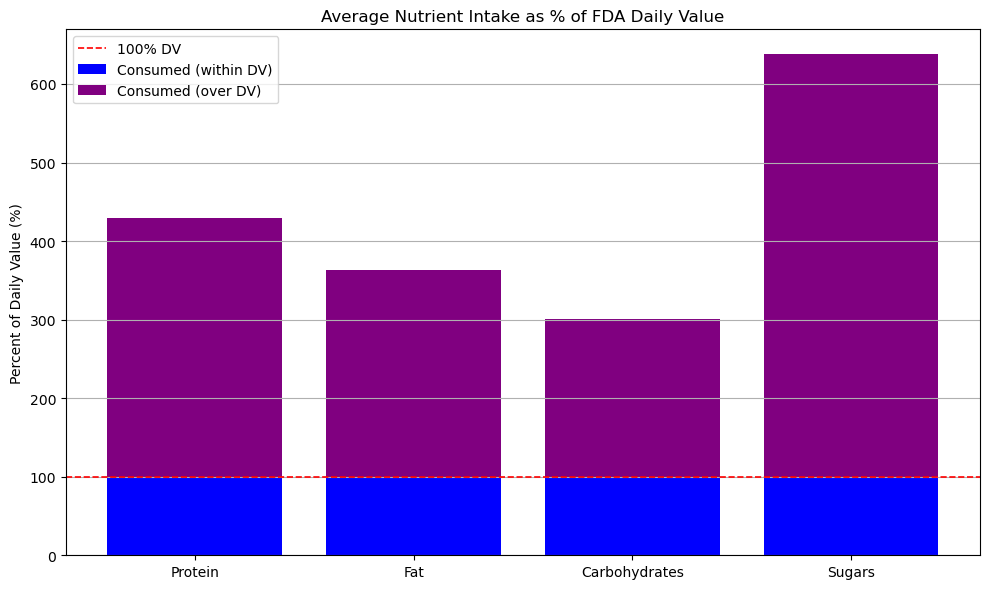

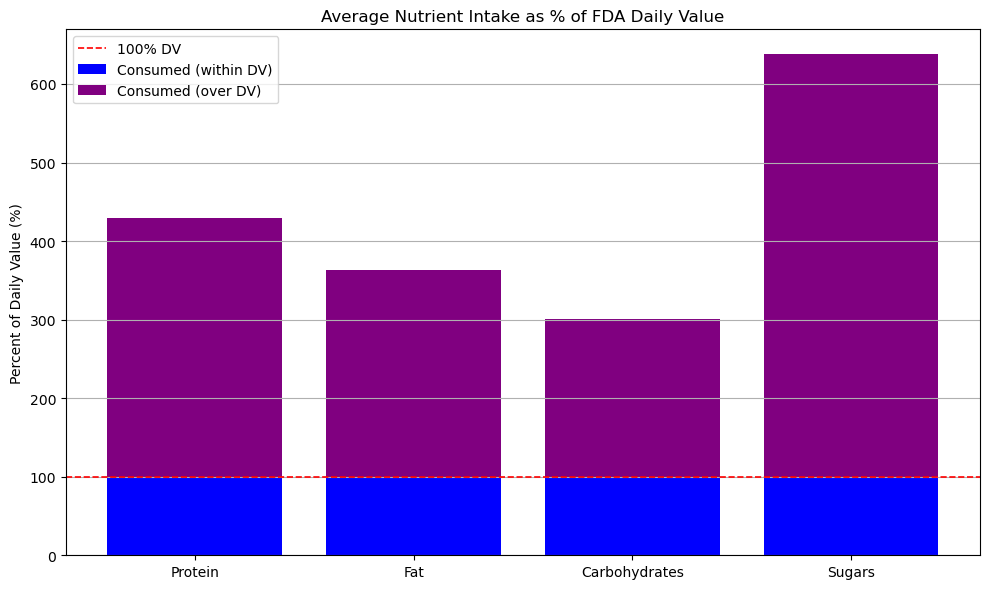

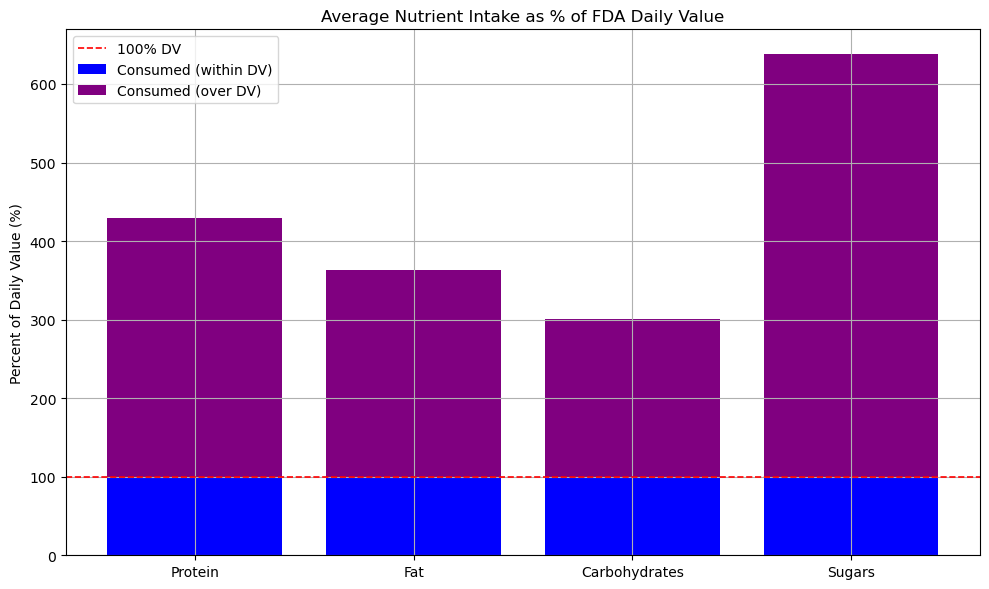

In [10]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from food_aps_mani import get_household_totals
from food_aps_mani import split_dv_levels 

df = pd.read_csv("csv_data/faps_fahnutrients.csv", encoding="latin-1")

# Daily FDA values for 2000 calorie diet (grams)
daily_values_dict = {"protein": 50, "totfat": 78, "carb": 275, "totsug": 50}

nutrient_labels = {
    "protein": "Protein",
    "totfat": "Fat",
    "carb": "Carbohydrates",
    "totsug": "Sugars",
}

nutrients = list(daily_values_dict.keys())

household_totals_df = get_household_totals(df, nutrients)
avg_grams_consumed = household_totals_df[nutrients].mean()

percent_dv_consumed = {
    nutrient: (avg_grams_consumed[nutrient] / dv) * 100
    for nutrient, dv in daily_values_dict.items()
}

labels, under_dv, over_dv = split_dv_levels(percent_dv_consumed, nutrient_labels)

# Plotting daily values
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(labels, under_dv, label="Consumed (within DV)", color="blue")
ax.bar(
    labels, over_dv, bottom=under_dv, label="Consumed (over DV)", color="purple"
)

# 100% DV Line
ax.axhline(100, color="red", linestyle="--", linewidth=1.2, label="100% DV")

ax.set_ylabel("Percent of Daily Value (%)")
ax.set_title("Average Nutrient Intake as % of FDA Daily Value")
ax.legend()
ax.grid(True)
plt.tight_layout()  # helps to avoid overlap
plt.show()

We created a bar chart as a visualization of the 10 most commonly eaten foods in the US and their corresponding NRF scores that we calculated. NRF score stands for Nutrient Rich Index scoring which is calculated by taking the sum of positive nutrients and subtracting the sum of negative nutrients from this. In order to normalize the NRF scores we adjusted this calculation by dividing each nutrient by it’s daily value amount in grams before they are summed and subtracted. This causes unhealthy foods to be closer to -1 and healthier foods to be closer to 1. One limitation of the visualizations we created were that we only took 7 nutrients into account. Those are sugars, fats, protein, carbohydrates, fiber, sodium, and water.

One thing we found interesting about the data is that fried chicken, which is generally known to be unhealthy, is listed as one of the more healthier foods along with caesar salad. We believe this is the case as the NRF consider protein as a healthier nutrient. And although the fried chicken is full of cholesterol, which is very unhealthy, we did not consider every single nutrient. This gave fried chicken an advantage. As for the caesar salad, there was a problem because although caesar salad is known to be healthier according to our index, there are no positive or negative nutrients.

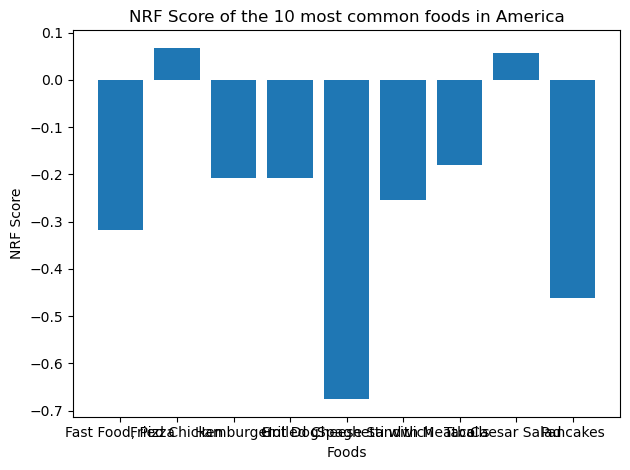

In [3]:
import json
import matplotlib.pyplot as plt
from datamanipulation import get_food_details 


with open("food_nutrition.json", encoding="utf-8") as file:
    data_string = file.read()
    data = json.loads(data_string)

# Preset the keys to know what the food is initailly

# Top american foods according to google
american_food_keys = [
    "Fast Food, Pizza",
    "Fried Chicken",
    "Hamburger",
    "Hot Dog",
    "Grilled Cheese Sandwich",
    "Spaghetti with Meatballs",
    "Taco",
    "Caesar Salad",
    "Pancakes",
]

matched_food = {key: None for key in american_food_keys}

for food in data:
    description = food.get("description", "").lower()

    for american_food in american_food_keys:
        if american_food.lower() in description:
            # print(f"Matched '{american_food}' with USDA item: {description}")
            if matched_food[american_food] is not None:
                pass  # Do nothing if the condition is false
            elif matched_food[american_food] is None:
                matched_food[american_food] = food
            else:
                pass


food_dict = {}

for food_name, usda_item in matched_food.items():
    if usda_item:  # Ensure the item is not None
        food_dict[food_name] = get_food_details(usda_item)
    else:
        food_dict[food_name] = [0] * 7


# this code gives us the total nutrients of the top 10 most eaten foods
total_nutrients = []
list_len = [0, 1, 2, 3, 4, 5, 6]
for i in list_len:
    total_one_nutrient = sum(values[i] for values in food_dict.values())
    total_nutrients.append(total_one_nutrient)


# order is proteins, fats, carbs, sugars, fibers, sodium, and water

nrf_score_list = []
for food, values in food_dict.items():
    nrf_score = ((values[0] / 50) + (values[4] / 28) + (values[6] / 500)) - (
        (values[1] / 20)
        + (values[3] / 50)
        + (values[5] / 2000)
        + (values[2] / 275)
    )
    nrf_score_list.append(nrf_score)

plt.bar(american_food_keys, nrf_score_list)
plt.title("NRF Score of the 10 most common foods in America")
plt.xlabel("Foods")
plt.ylabel("NRF Score")
plt.tight_layout()
plt.show()

## Conclusion 
The data showed that the typical American has overconsumption patterns of bad nutrients that can lead to negative health outcomes, such as obesity and heart disease. We also found that every single popular American food was unhealthy. Although considered unhealthy, it may appear relatively healthy based on the NRF score. Carbohydrates are also the most consumed nutrient, which points to the fact that processed snacks and grains are super carbohydrate-rich and popular in the American diet, leading to weight gain. While the project focused on seven nutrients, the limited scope highlights the need for more comprehensive analyses of all potential nutrients in foods.

There were no ethical considerations surrounding data sourcing as we got our data from the US Department of Agriculture, which provides access to API keys for public use. 

We learned how much dictionaries can be beneficial as well as grouping and looping information. Our information from USDA FoodData Central was made into a nested dictionary in a JSON file. It was beneficial for us to learn how to navigate dictionaries in a way that could be useful by presenting and assigning values. We also found that learning how to merge and group very helpful and working with large datasets. 

We had a lot of issues in finding an API/ library that worked with the question we needed. It would be frustrating as the documentation would say one thing, but it hasn’t been updated or has breaks in what needs to be changed. This led us to work and take a lot of time to figure out the data and realize that it either wasn’t what we needed or the data was not. 

If we had more time, we would look into getting an API key for the USDA’s National Household Food Acquisition and Purchase Survey. As it is paid and takes time for approval to receive, the API key was going to be a lost key and caused me to find other information through a CSV. As it was a public CSV, it was a very small section of information, and having something more recent for the Monthly Nutrient Consumption from Food-at-Home Purchases line chart would be beneficial. The data would be less misleading that way. 

We also like to look into exercise and see how much Americans are burning these nutrients off. Although there were high spikes in fat and sugar, carbohydrates were the highest, which isn’t necessarily a bad nutrient all the time. If Americans were doing cardio, would it balance out the amount of carbohydrates?